# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | naze
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | armidale
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 1 | taurianova
Processing Record 12 of Set 1 | domat
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | muros
Processing Record 17 of Set 1 | poum
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | pacific grove
Processing Record 21 of Set 1 | new norfolk
Processing Recor

Processing Record 40 of Set 4 | uusikaupunki
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | narsaq
Processing Record 43 of Set 4 | beringovskiy
Processing Record 44 of Set 4 | high rock
Processing Record 45 of Set 4 | buchanan
Processing Record 46 of Set 4 | uarini
Processing Record 47 of Set 4 | kitgum
Processing Record 48 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 49 of Set 4 | klaksvik
Processing Record 0 of Set 5 | tongliao
Processing Record 1 of Set 5 | boende
Processing Record 2 of Set 5 | ipixuna
Processing Record 3 of Set 5 | kodiak
Processing Record 4 of Set 5 | mishan
Processing Record 5 of Set 5 | ermioni
Processing Record 6 of Set 5 | inderborskiy
City not found. Skipping...
Processing Record 7 of Set 5 | khasan
Processing Record 8 of Set 5 | coihaique
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | vitim
Processing Record 11 of Set 5 | auki
Processing Record 12 of Set 5 | dingle
Processing Record 

Processing Record 30 of Set 8 | oyotun
Processing Record 31 of Set 8 | longyearbyen
Processing Record 32 of Set 8 | saint-louis
Processing Record 33 of Set 8 | inuvik
Processing Record 34 of Set 8 | sosua
Processing Record 35 of Set 8 | trelew
Processing Record 36 of Set 8 | santiago del estero
Processing Record 37 of Set 8 | eseka
Processing Record 38 of Set 8 | galesong
Processing Record 39 of Set 8 | kurilsk
Processing Record 40 of Set 8 | visnes
Processing Record 41 of Set 8 | wajir
Processing Record 42 of Set 8 | mount gambier
Processing Record 43 of Set 8 | witbank
Processing Record 44 of Set 8 | tiznit
Processing Record 45 of Set 8 | mazatlan
Processing Record 46 of Set 8 | soyo
Processing Record 47 of Set 8 | langcangan
Processing Record 48 of Set 8 | olafsvik
Processing Record 49 of Set 8 | carnarvon
Processing Record 0 of Set 9 | sorong
Processing Record 1 of Set 9 | mount isa
Processing Record 2 of Set 9 | cayenne
Processing Record 3 of Set 9 | karamea
City not found. Skippi

Processing Record 19 of Set 12 | olot
Processing Record 20 of Set 12 | dhidhdhoo
Processing Record 21 of Set 12 | ambalema
Processing Record 22 of Set 12 | ramon
Processing Record 23 of Set 12 | ouegoa
Processing Record 24 of Set 12 | mogadouro
Processing Record 25 of Set 12 | oktyabrskiy
Processing Record 26 of Set 12 | kaili
Processing Record 27 of Set 12 | champua
Processing Record 28 of Set 12 | seoul
Processing Record 29 of Set 12 | muret
Processing Record 30 of Set 12 | loveland
Processing Record 31 of Set 12 | rungata
City not found. Skipping...
Processing Record 32 of Set 12 | codo
Processing Record 33 of Set 12 | sergeyevka
Processing Record 34 of Set 12 | sarankhola
Processing Record 35 of Set 12 | eyrarbakki
Processing Record 36 of Set 12 | helong
Processing Record 37 of Set 12 | barcelos
Processing Record 38 of Set 12 | itirapina
Processing Record 39 of Set 12 | xique-xique
Processing Record 40 of Set 12 | dolores
Processing Record 41 of Set 12 | iracoubo
Processing Record 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,29.19,84,83,1.79,EC,1681249307
1,naze,28.3667,129.4833,19.51,91,80,1.62,JP,1681249362
2,port lincoln,-34.7333,135.8667,16.15,75,16,7.47,AU,1681249579
3,victoria,22.2855,114.1577,22.68,90,79,0.97,HK,1681249579
4,armidale,-30.5167,151.6500,10.07,60,51,1.72,AU,1681249580


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.19,84,83,1.79,EC,1681249307
1,naze,28.3667,129.4833,19.51,91,80,1.62,JP,1681249362
2,port lincoln,-34.7333,135.8667,16.15,75,16,7.47,AU,1681249579
3,victoria,22.2855,114.1577,22.68,90,79,0.97,HK,1681249579
4,armidale,-30.5167,151.6500,10.07,60,51,1.72,AU,1681249580


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

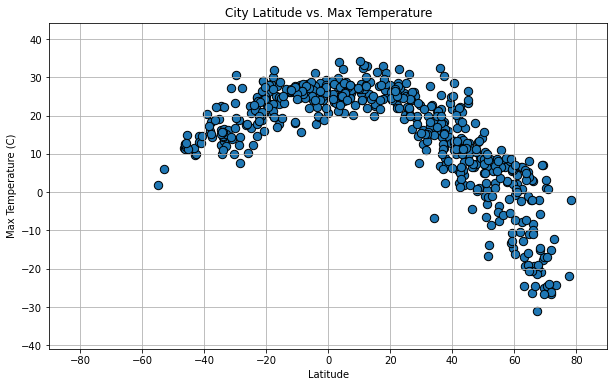

In [20]:
# Build scatter plot for latitude vs. temperature

lat=city_data_df["Lat"]
max_temp=city_data_df["Max Temp"]

plt.figure(figsize=(10,6))

plt.scatter(lat, max_temp,s=70,edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature")

plt.xlim(-90, 90)
plt.ylim(min(max_temp)-10, max(max_temp)+10)

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

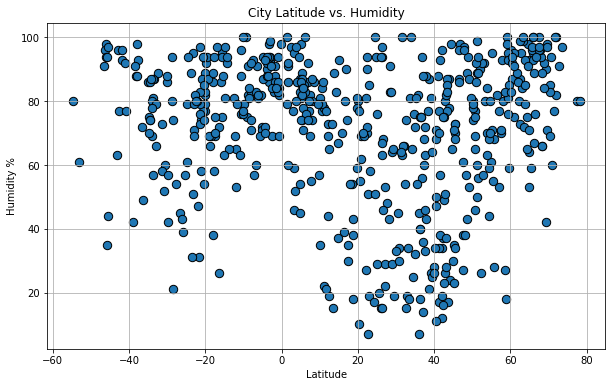

In [21]:
lat=city_data_df["Lat"]
Humidity=city_data_df["Humidity"]
plt.figure(figsize=(10,6))

plt.scatter(lat, Humidity,s=70,edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("City Latitude vs. Humidity")

plt.grid()
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

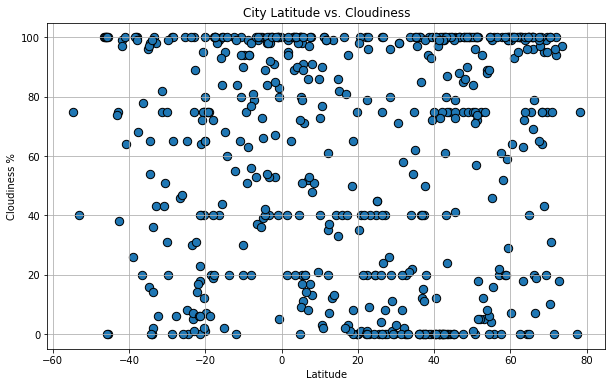

In [22]:
lat=city_data_df["Lat"]
Cloudiness=city_data_df["Cloudiness"]
plt.figure(figsize=(10,6))

plt.scatter(lat, Cloudiness,s=70,edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

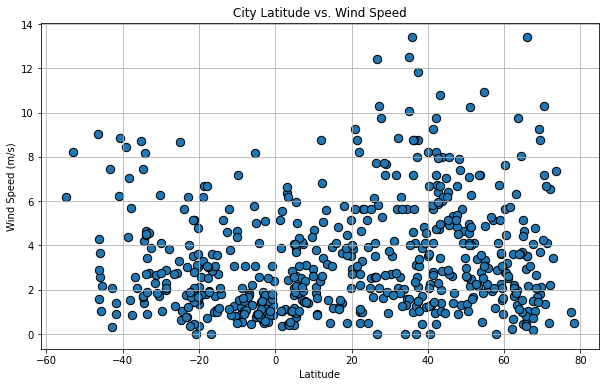

In [23]:
lat=city_data_df["Lat"]
Wind_Speed=city_data_df["Wind Speed"]
plt.figure(figsize=(10,6))

plt.scatter(lat, Wind_Speed,s=70,edgecolor="black")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")

plt.grid()
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [57]:
# Define a function to create Linear Regression plots

def irfan(x,y,x_label,y_label,x_coord,y_coord):

    plt.figure(figsize=(10,6))

    plt.scatter(x, y,s=70,c="blue")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
# irfan(city_data_df["Lat"],city_data_df["Wind Speed"],"lat","Wind Speed (m/s)")

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x_coord,y_coord),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")
    
    plt.show()

The r-squared is: 0.02209271787867446


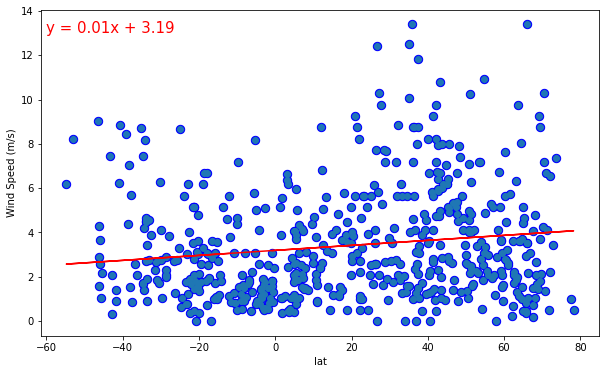

In [58]:
irfan(city_data_df["Lat"],city_data_df["Wind Speed"],"lat","Wind Speed (m/s)",-60,13)

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,naze,28.3667,129.4833,19.51,91,80,1.62,JP,1681249362
3,victoria,22.2855,114.1577,22.68,90,79,0.97,HK,1681249579
7,cabo san lucas,22.8909,-109.9124,32.19,19,0,5.66,MX,1681249386
8,taurianova,38.3563,16.0109,13.06,77,94,3.88,IT,1681249581
9,domat,46.8348,9.4508,6.57,98,100,1.83,CH,1681249581


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.19,84,83,1.79,EC,1681249307
2,port lincoln,-34.7333,135.8667,16.15,75,16,7.47,AU,1681249579
4,armidale,-30.5167,151.6500,10.07,60,51,1.72,AU,1681249580
5,hobart,-42.8794,147.3294,9.67,96,75,2.06,AU,1681249580
6,rikitea,-23.1203,-134.9692,24.72,71,100,3.04,PF,1681249295


In [53]:
southern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto ayora,-0.7393,-90.3518,29.19,84,83,1.79,EC,1681249307
2,port lincoln,-34.7333,135.8667,16.15,75,16,7.47,AU,1681249579
4,armidale,-30.5167,151.6500,10.07,60,51,1.72,AU,1681249580
5,hobart,-42.8794,147.3294,9.67,96,75,2.06,AU,1681249580
6,rikitea,-23.1203,-134.9692,24.72,71,100,3.04,PF,1681249295
...,...,...,...,...,...,...,...,...,...
556,katherine,-14.4667,132.2667,25.18,94,100,2.06,AU,1681249727
560,viedma,-40.8135,-62.9967,14.67,77,64,8.86,AR,1681249412
564,kitui,-1.3670,38.0106,18.78,84,100,1.04,KE,1681249729


In [54]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,naze,28.3667,129.4833,19.51,91,80,1.62,JP,1681249362
3,victoria,22.2855,114.1577,22.68,90,79,0.97,HK,1681249579
7,cabo san lucas,22.8909,-109.9124,32.19,19,0,5.66,MX,1681249386
8,taurianova,38.3563,16.0109,13.06,77,94,3.88,IT,1681249581
9,domat,46.8348,9.4508,6.57,98,100,1.83,CH,1681249581
...,...,...,...,...,...,...,...,...,...
562,iqaluit,63.7506,-68.5145,-7.15,79,100,9.77,CA,1681249729
563,ust-nera,64.5667,143.2000,-15.98,91,100,1.55,RU,1681249729
565,bafata,12.1667,-14.7500,30.20,44,61,2.61,GW,1681249730


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7269894378126707


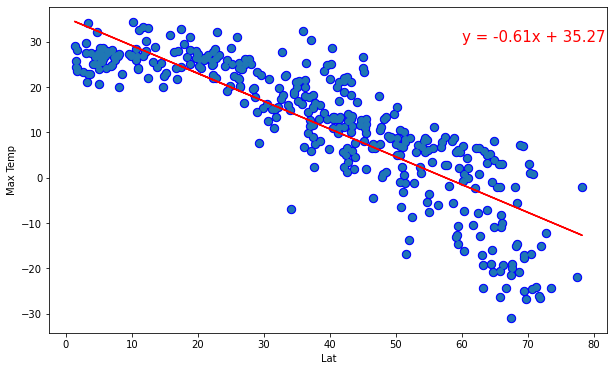

In [66]:
# Linear regression on Northern Hemisphere
irfan(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],"Lat","Max Temp",60,30)

The r-squared is: 0.5386911035442261


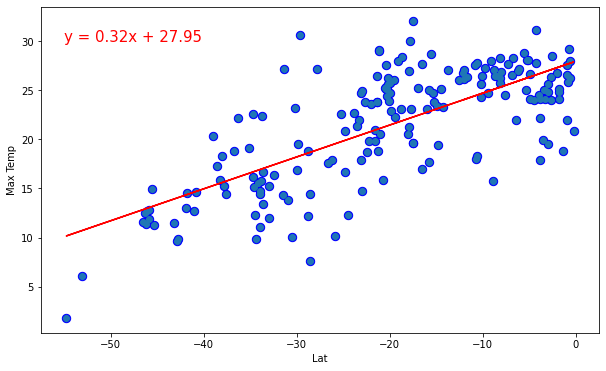

In [65]:
# Linear regression on Southern Hemisphere
irfan(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],"Lat","Max Temp",-55,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.024021015951328765


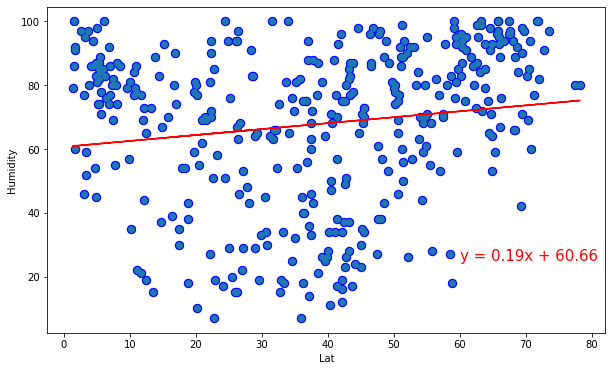

In [72]:
# Northern Hemisphere
irfan(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],"Lat","Humidity",60,25)

The r-squared is: 0.029867318437970084


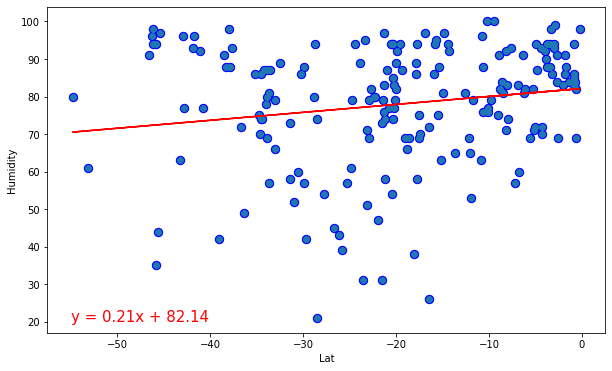

In [73]:
# Southern Hemisphere
irfan(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],"Lat","Humidity",-55,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02127703279829879


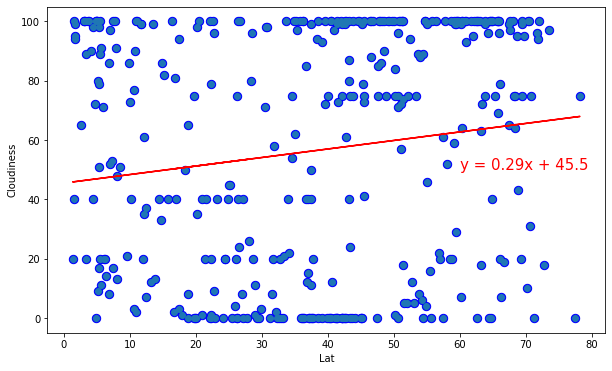

In [76]:
# Northern Hemisphere
irfan(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],"Lat","Cloudiness",60,50)

The r-squared is: 0.021784710959361304


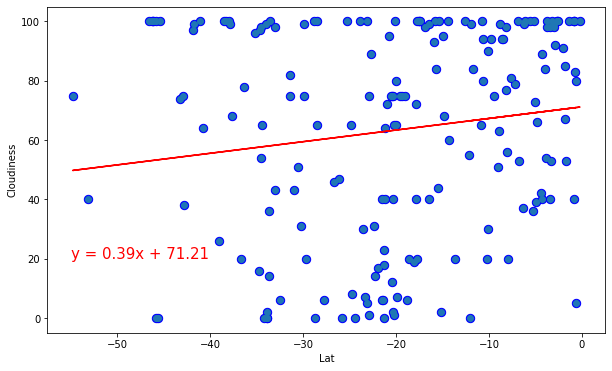

In [77]:
# Southern Hemisphere
irfan(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],"Lat","Cloudiness",-55,20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.00605706954827328


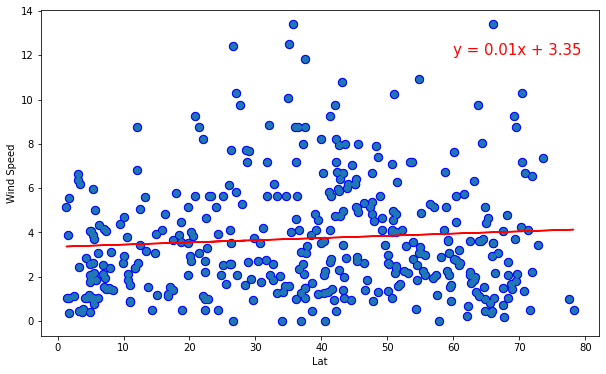

In [82]:
# Northern Hemisphere
irfan(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],"Lat","Wind Speed",60,12)

The r-squared is: 0.12676609244856415


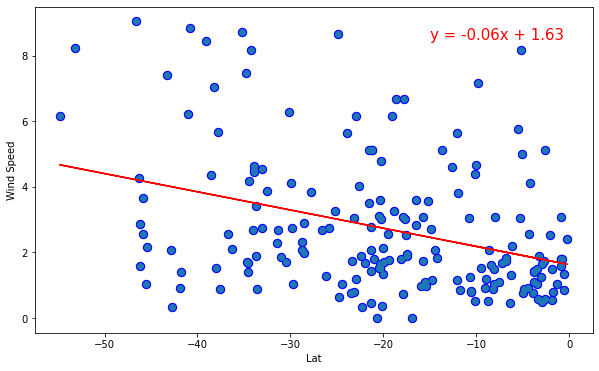

In [88]:
# Southern Hemisphere
irfan(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],"Lat","Wind Speed",-15,8.5)

**Discussion about the linear relationship:** YOUR RESPONSE HERE